## Visualizing:
### Only pretrained, not finetuned

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    e_x = np.exp(x - np.max(x))  # subtracting np.max(x) for numerical stability
    return e_x / e_x.sum(axis=-1, keepdims=True)

def display_avg_attention_scores(filenames):
    num_files = len(filenames)
    
    # Determine the grid size for subplots
    cols = 3  # for example, 3 columns
    rows = int(np.ceil(num_files / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    
    # If there's only one row, axes is a 1D array
    if rows == 1:
        axes = np.expand_dims(axes, axis=0)
    
    for idx, filename in enumerate(filenames):
        try:
            # Load the raw attention scores
            raw_scores = np.load(filename, allow_pickle=True)
            
            # Apply softmax to get attention weights
            attention_weights = softmax(raw_scores)

            # Calculate the average attention weights across all samples (or timesteps T)
            avg_weights = np.mean(attention_weights, axis=0)
        except:
            print(f'Error loading attention scores from {filename}')
            continue

        # Display the averaged attention weights in a subplot
        ax = axes[idx // cols, idx % cols]
        cax = ax.imshow(avg_weights, cmap='viridis')
        ax.set_title(f'Head {idx}')
        ax.set_xlabel('Target Token Position')
        ax.set_ylabel('Source Token Position')
        
        # Add a colorbar for each subplot
        fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
    
    # Remove any remaining empty subplots
    for j in range(idx+1, rows*cols):
        fig.delaxes(axes.flatten()[j])
    
    plt.tight_layout()
    plt.show()


In [2]:
import os
import sys
project_root = os.environ['DIR_PATH']
sys.path.insert(0, '{}'.format(project_root))

from main_task_caption import Args_Caption
# # Create the model attention plots


args = Args_Caption(features_dir="data", do_eval=True, output_dir="", export_attention_scores=True)

# args.visual_num_hidden_layers = 6
# args.cross_num_hidden_layers = 3
# args.decoder_num_hidden_layers = 3

# args.init_model = "/home/karolwojtulewicz/code/NSVA/out_pretrain_6e_0b_3c_1d_audio_kinetics_scaled_896bs/pytorch_model.bin.pretrain.500"
# init_training_caption(args)

/home/karolwojtulewicz/anaconda3/envs/univl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: wojaczek27. Use `wandb login --relogin` to force relogin


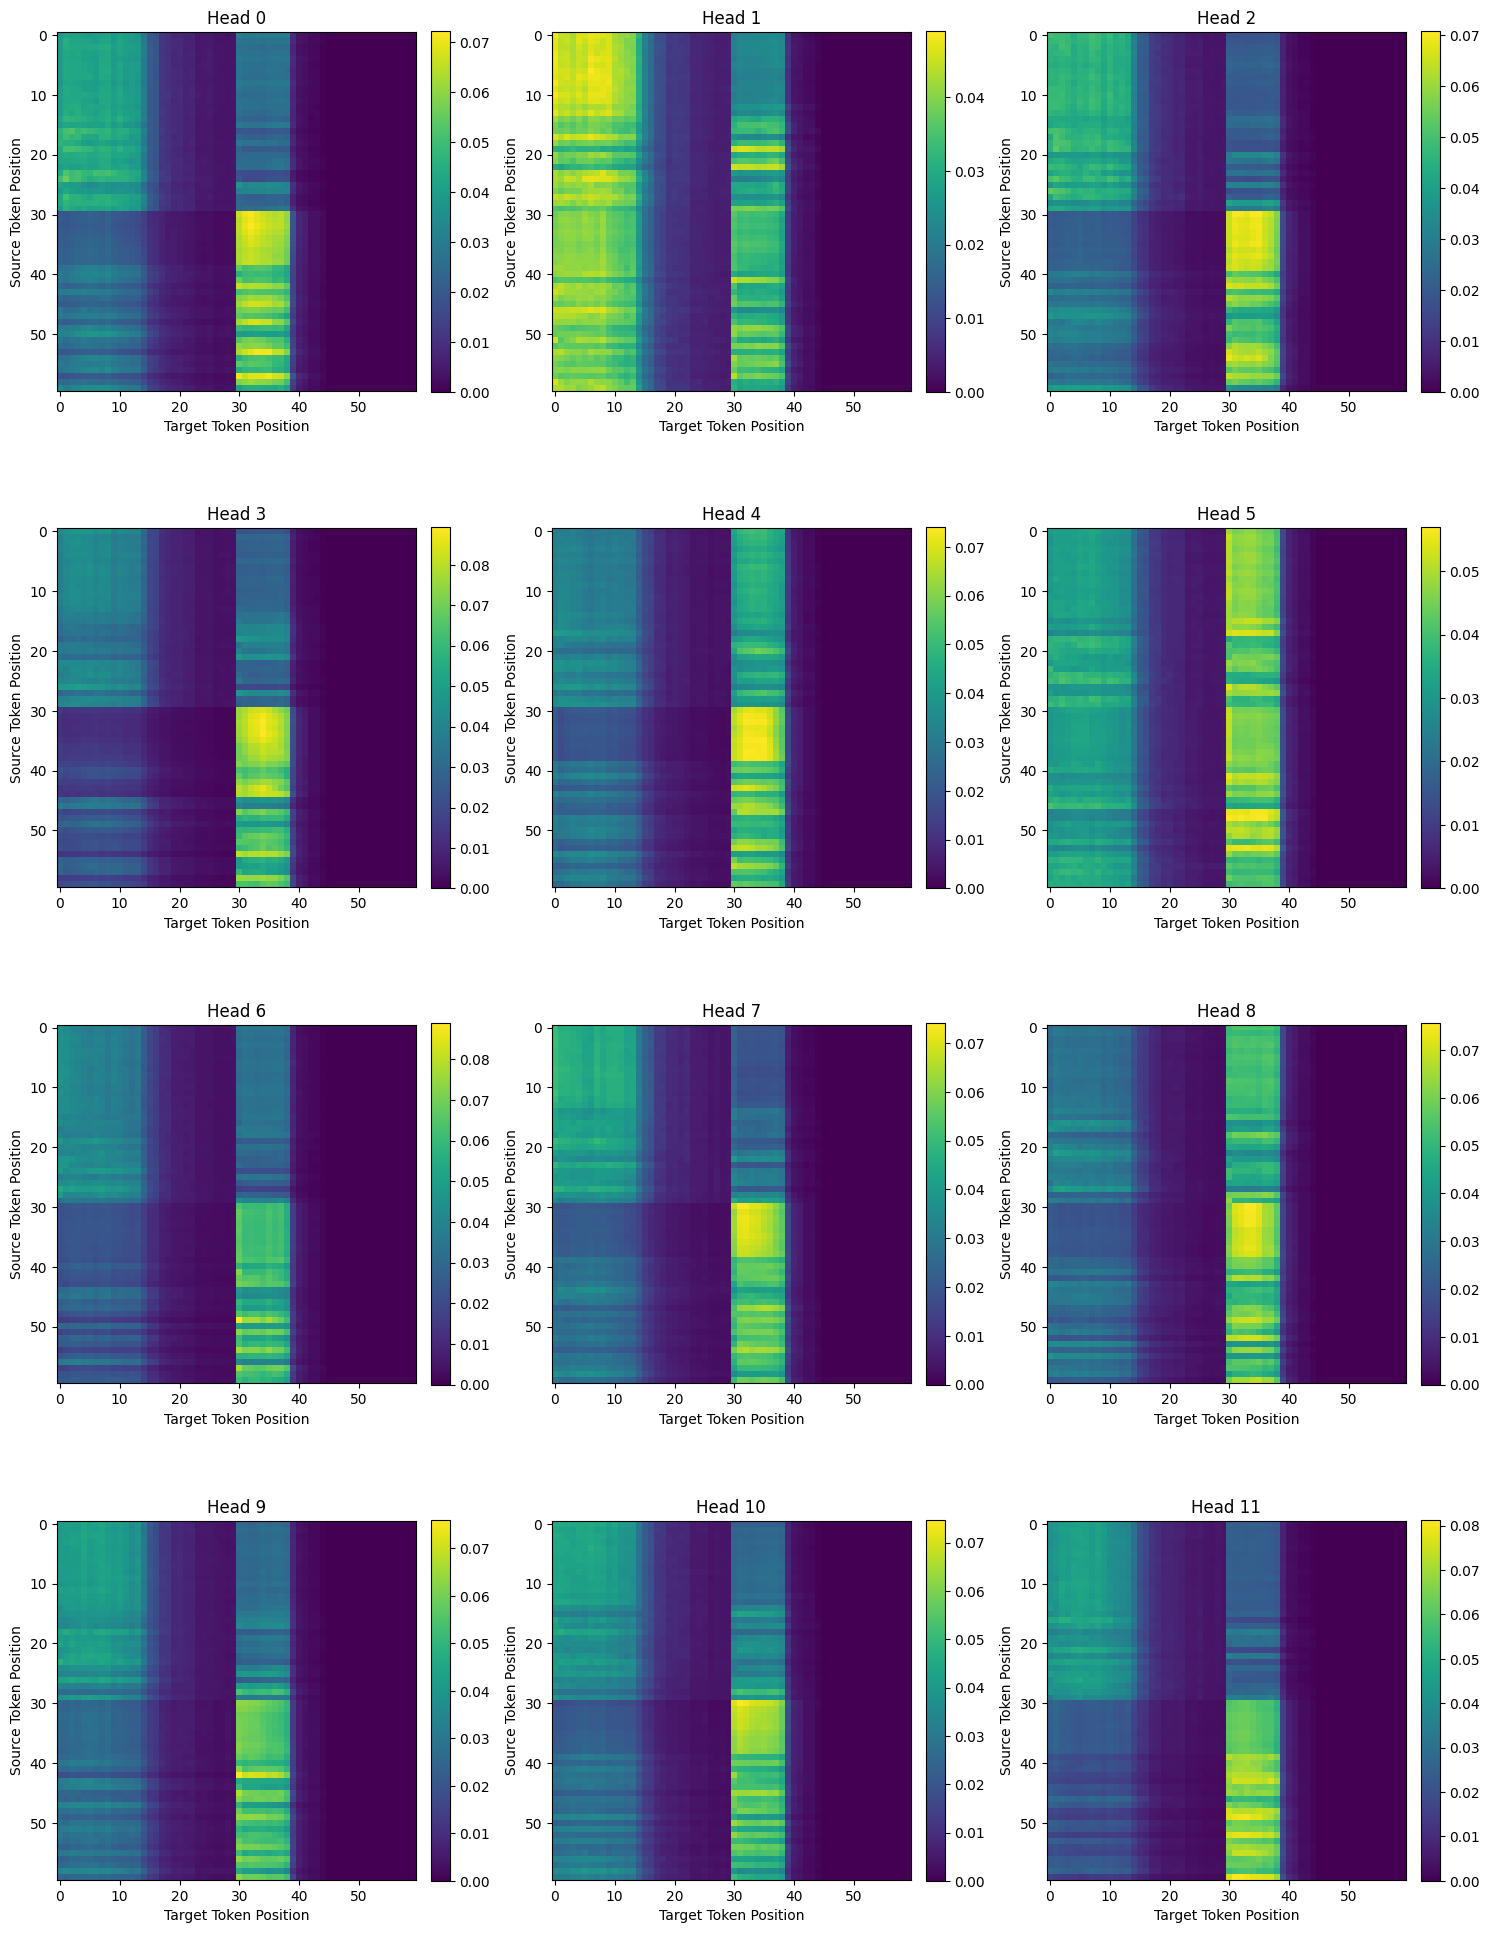

In [3]:
save_dir = '{}/attention_scores'.format(project_root)
filepaths = [os.path.join(save_dir, f"cross_attention_layer_0_head_{i}.npy") for i in range(12)]  # assuming 12 layers
display_avg_attention_scores(filepaths)


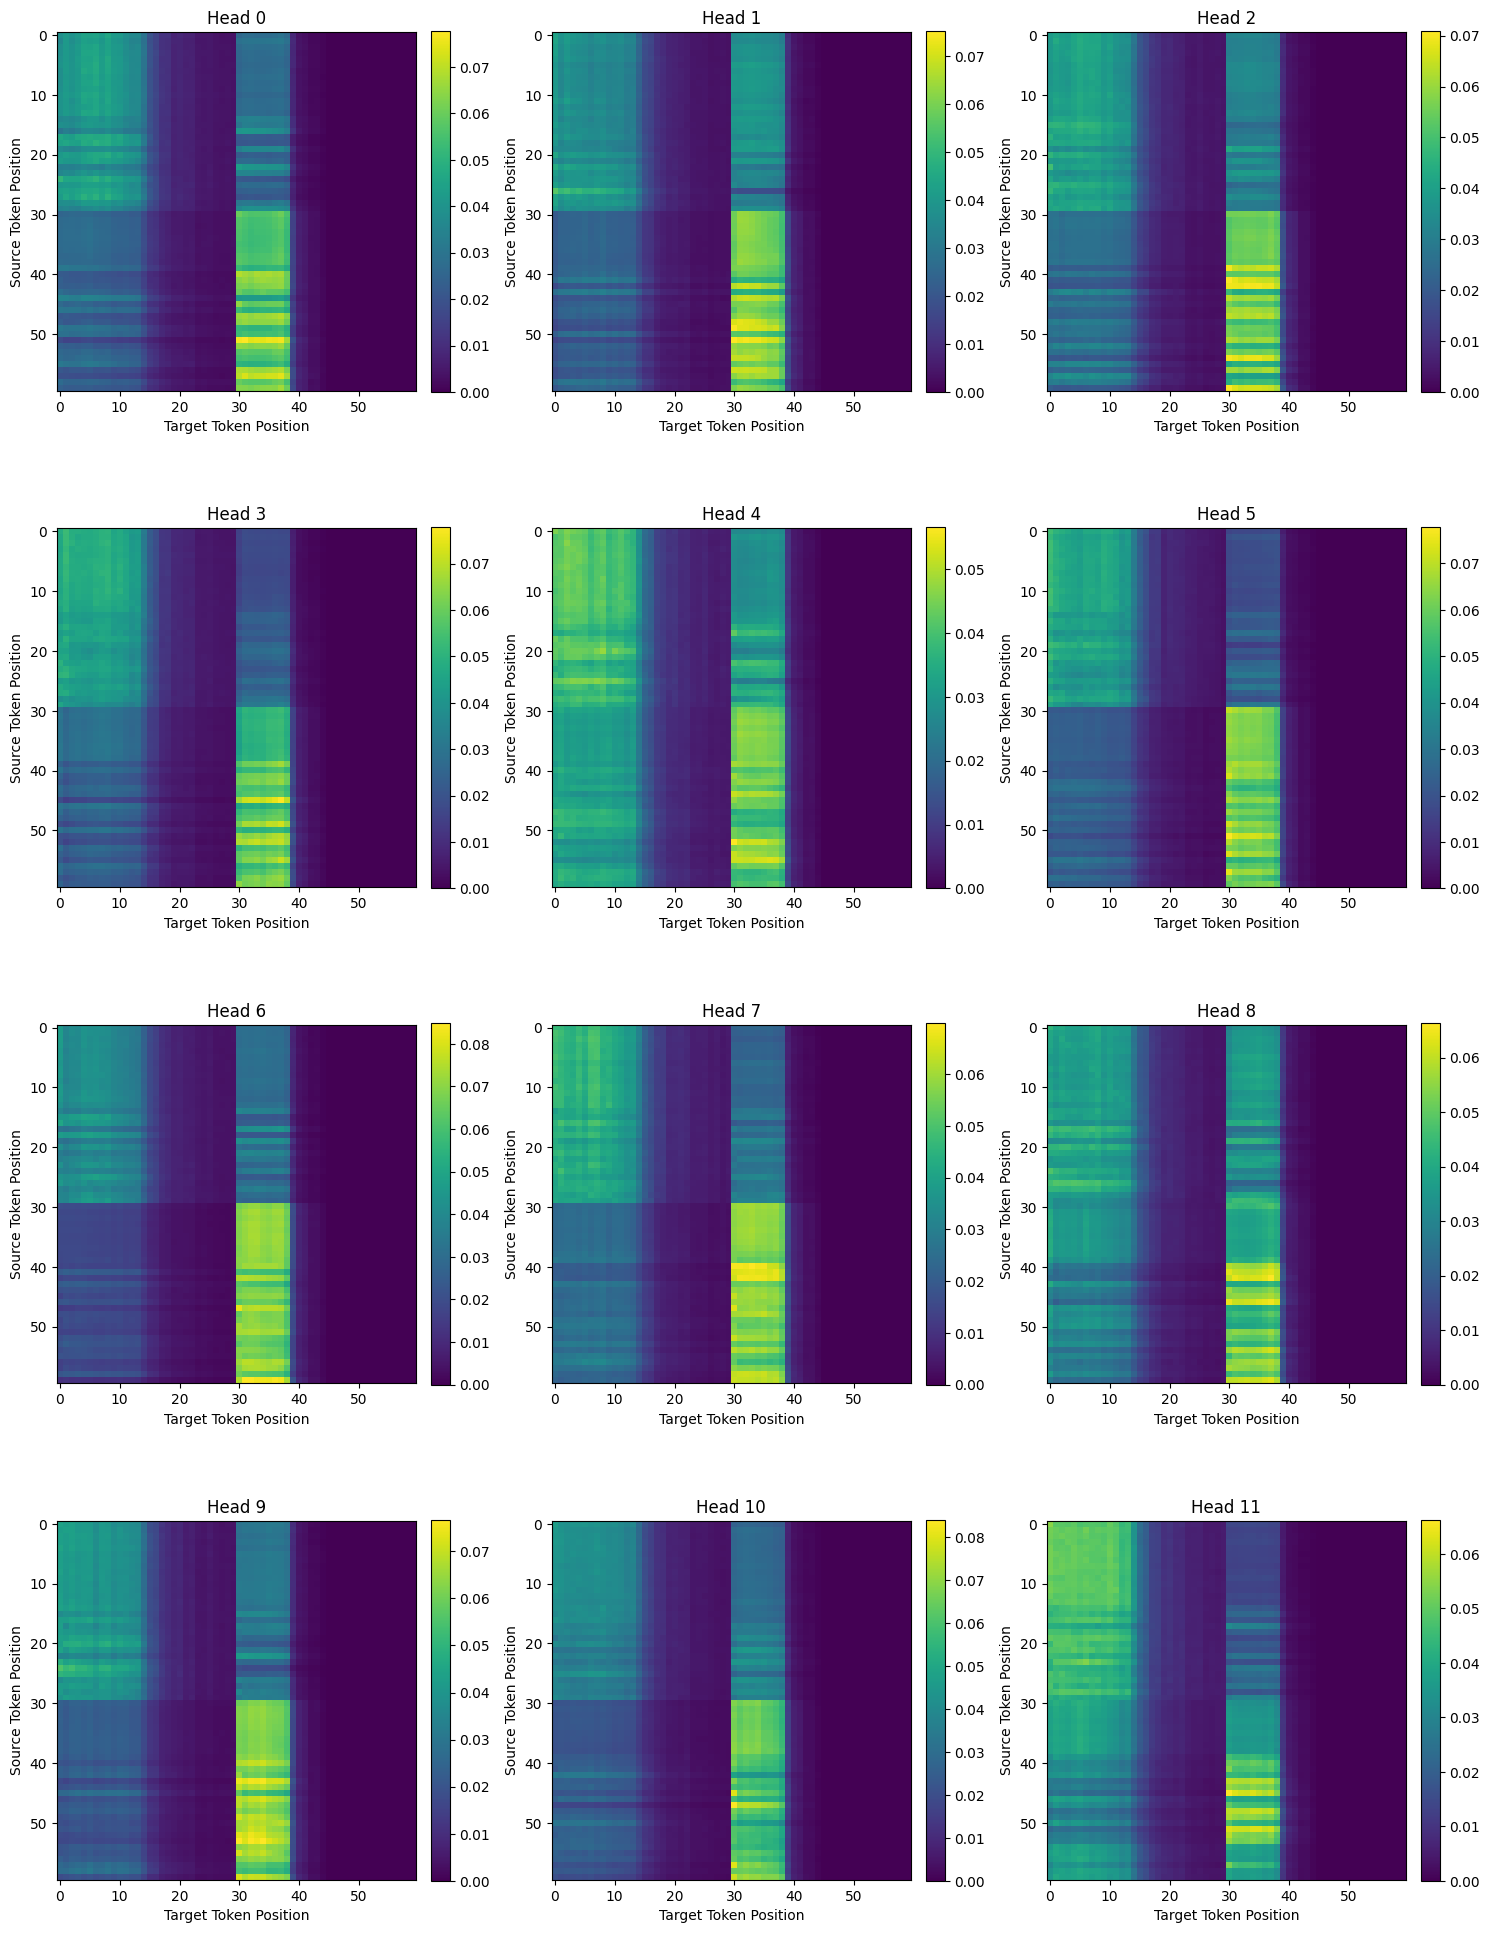

In [4]:
filepaths = [os.path.join(save_dir, f"cross_attention_layer_1_head_{i}.npy") for i in range(12)]  # assuming 12 layers
display_avg_attention_scores(filepaths)

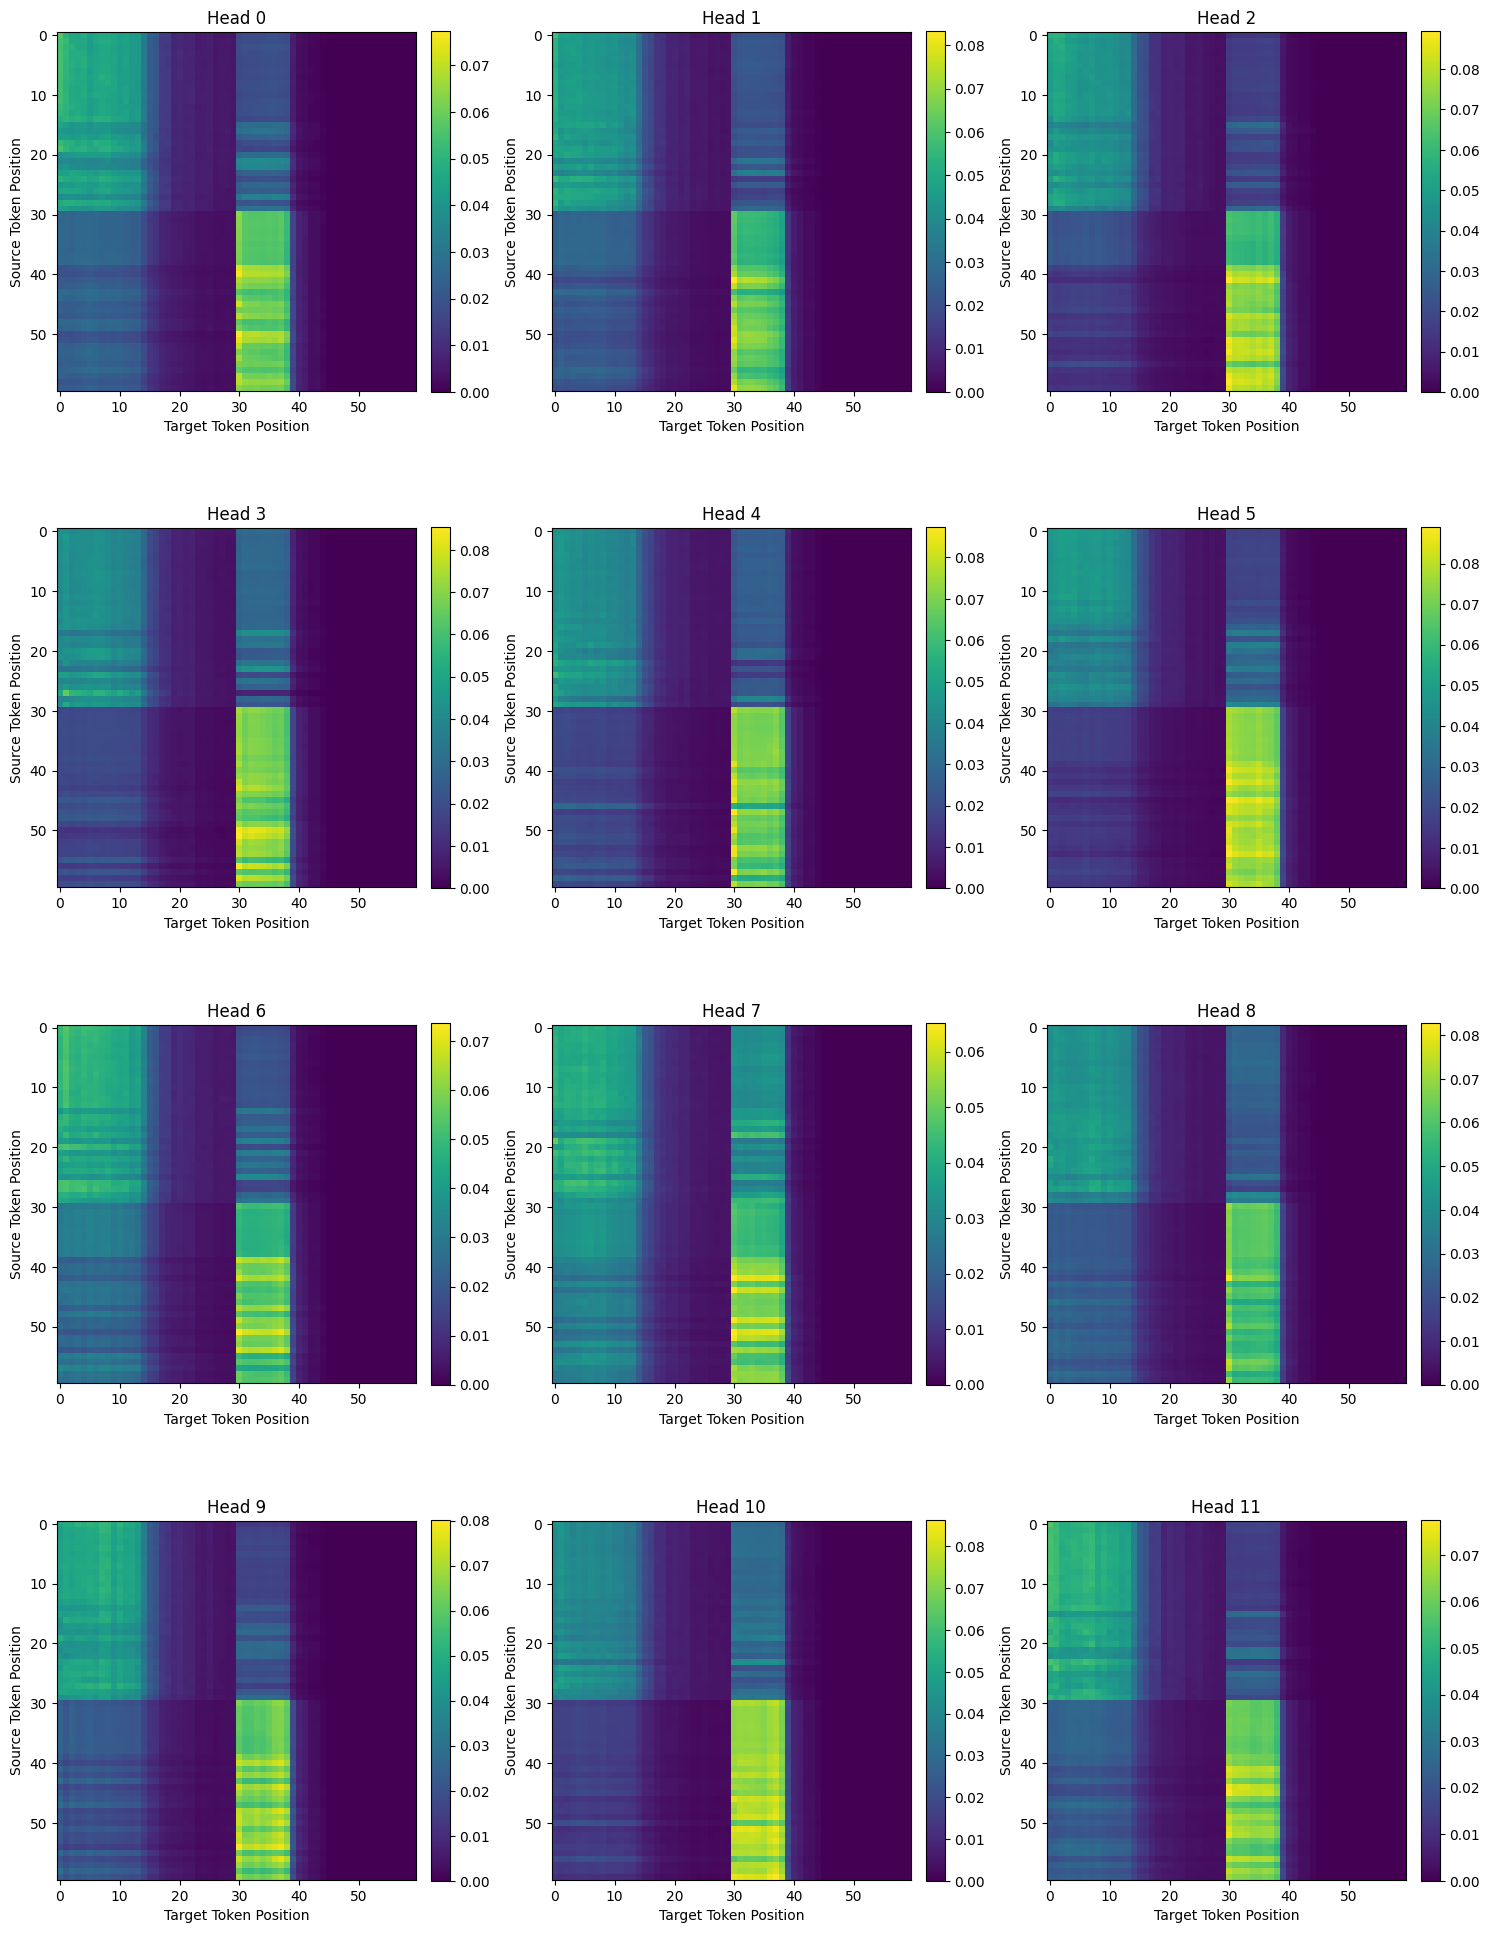

In [5]:
filepaths = [os.path.join(save_dir, f"cross_attention_layer_2_head_{i}.npy") for i in range(12)]  # assuming 12 layers
display_avg_attention_scores(filepaths)

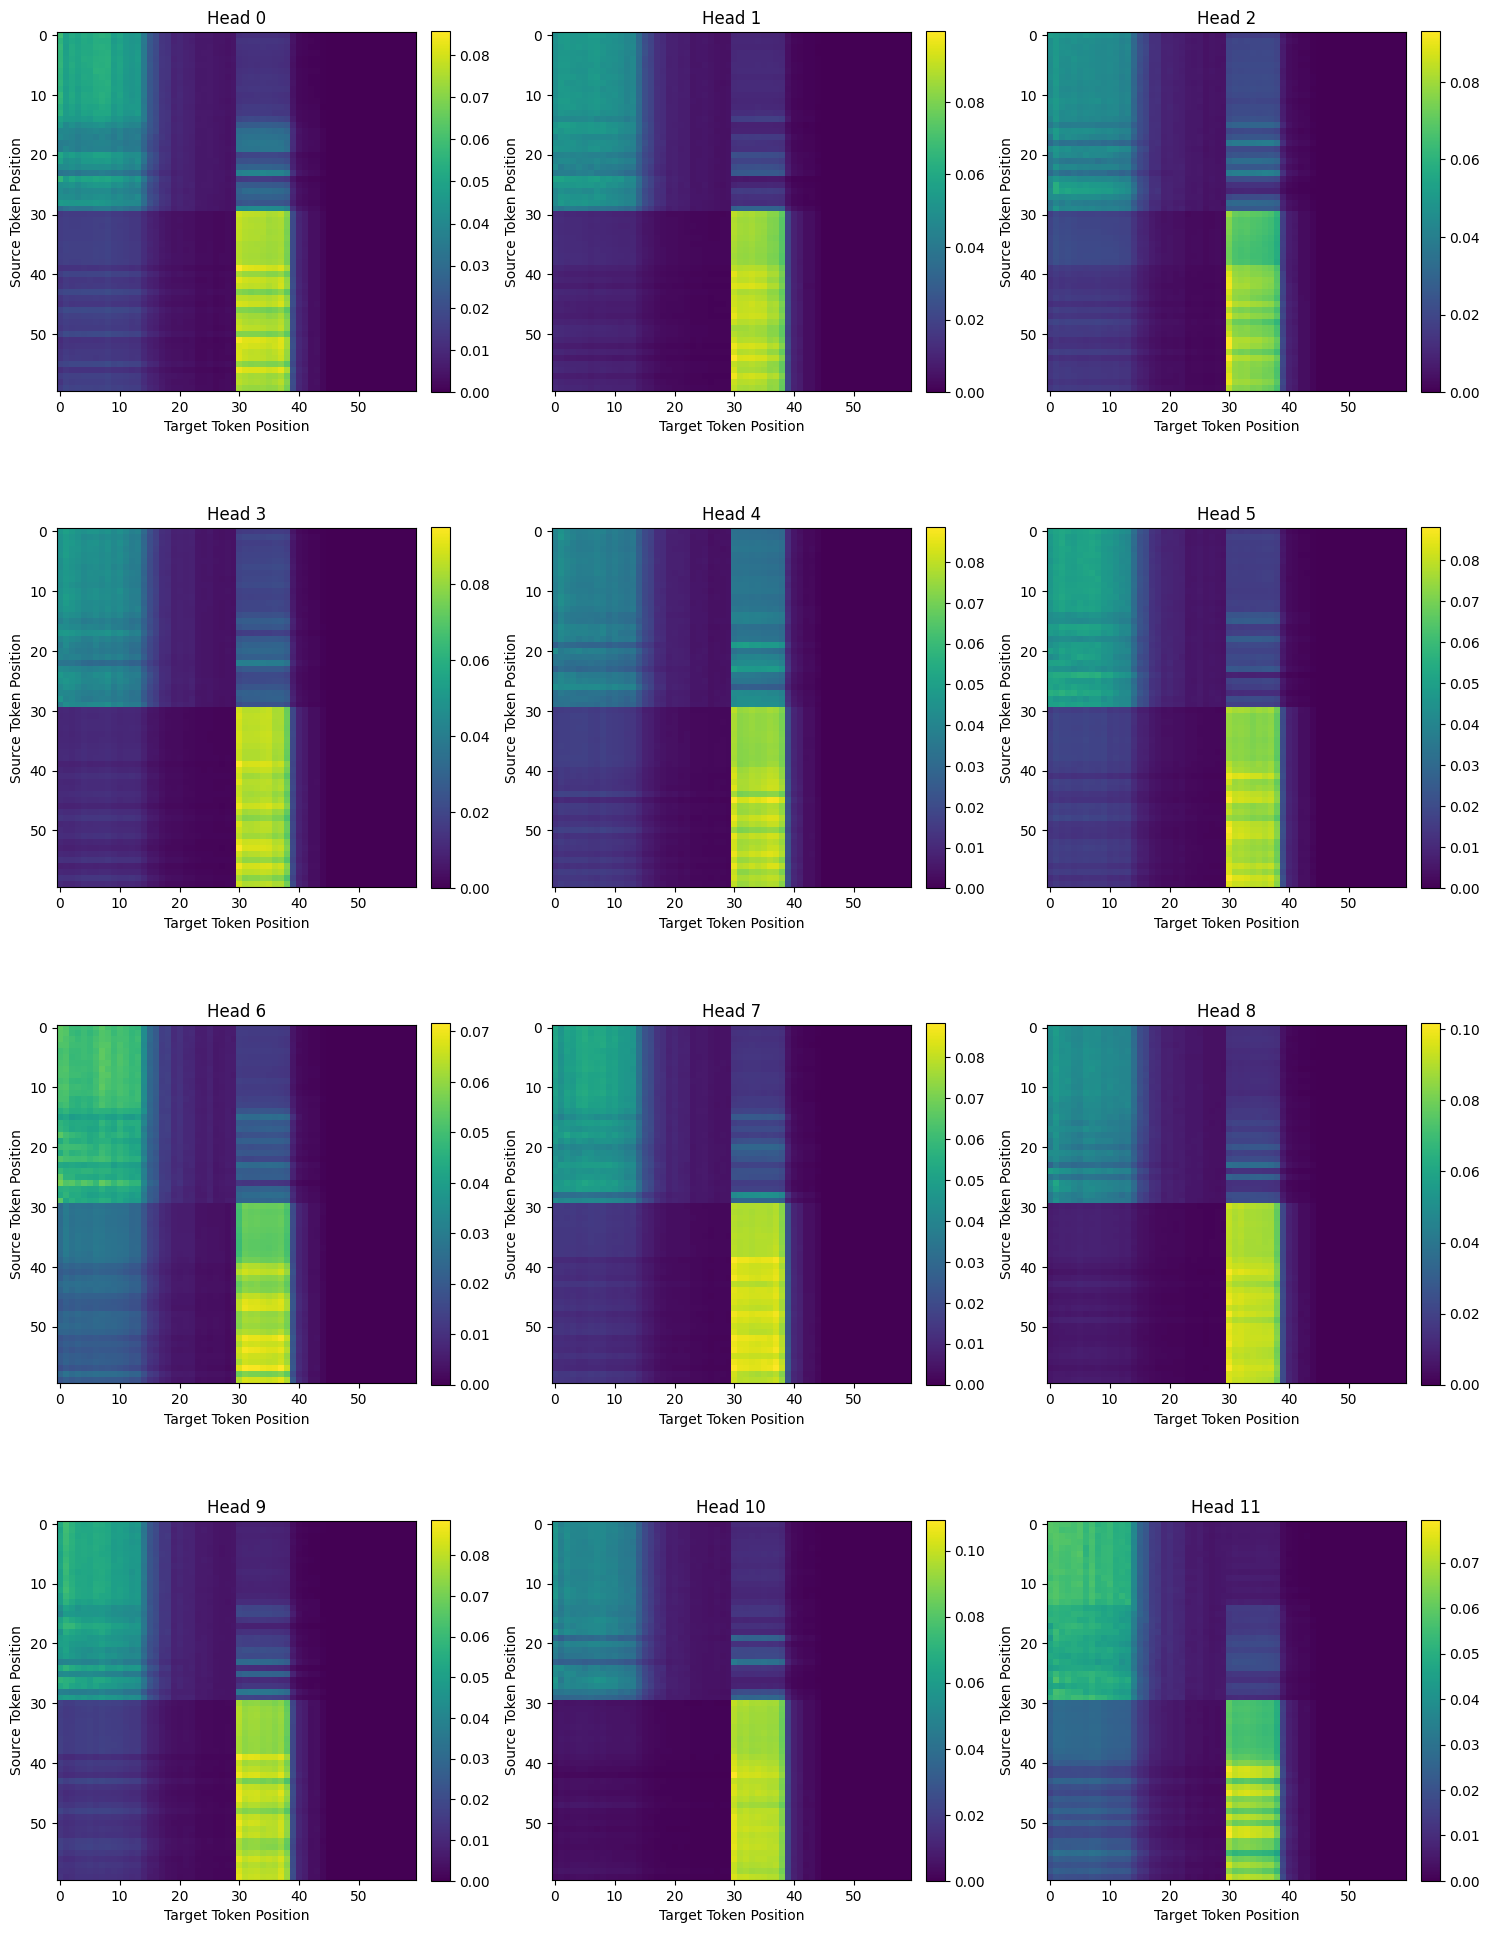

In [6]:
filepaths = [os.path.join(save_dir, f"cross_attention_layer_3_head_{i}.npy") for i in range(12)]  # assuming 12 layers
display_avg_attention_scores(filepaths)

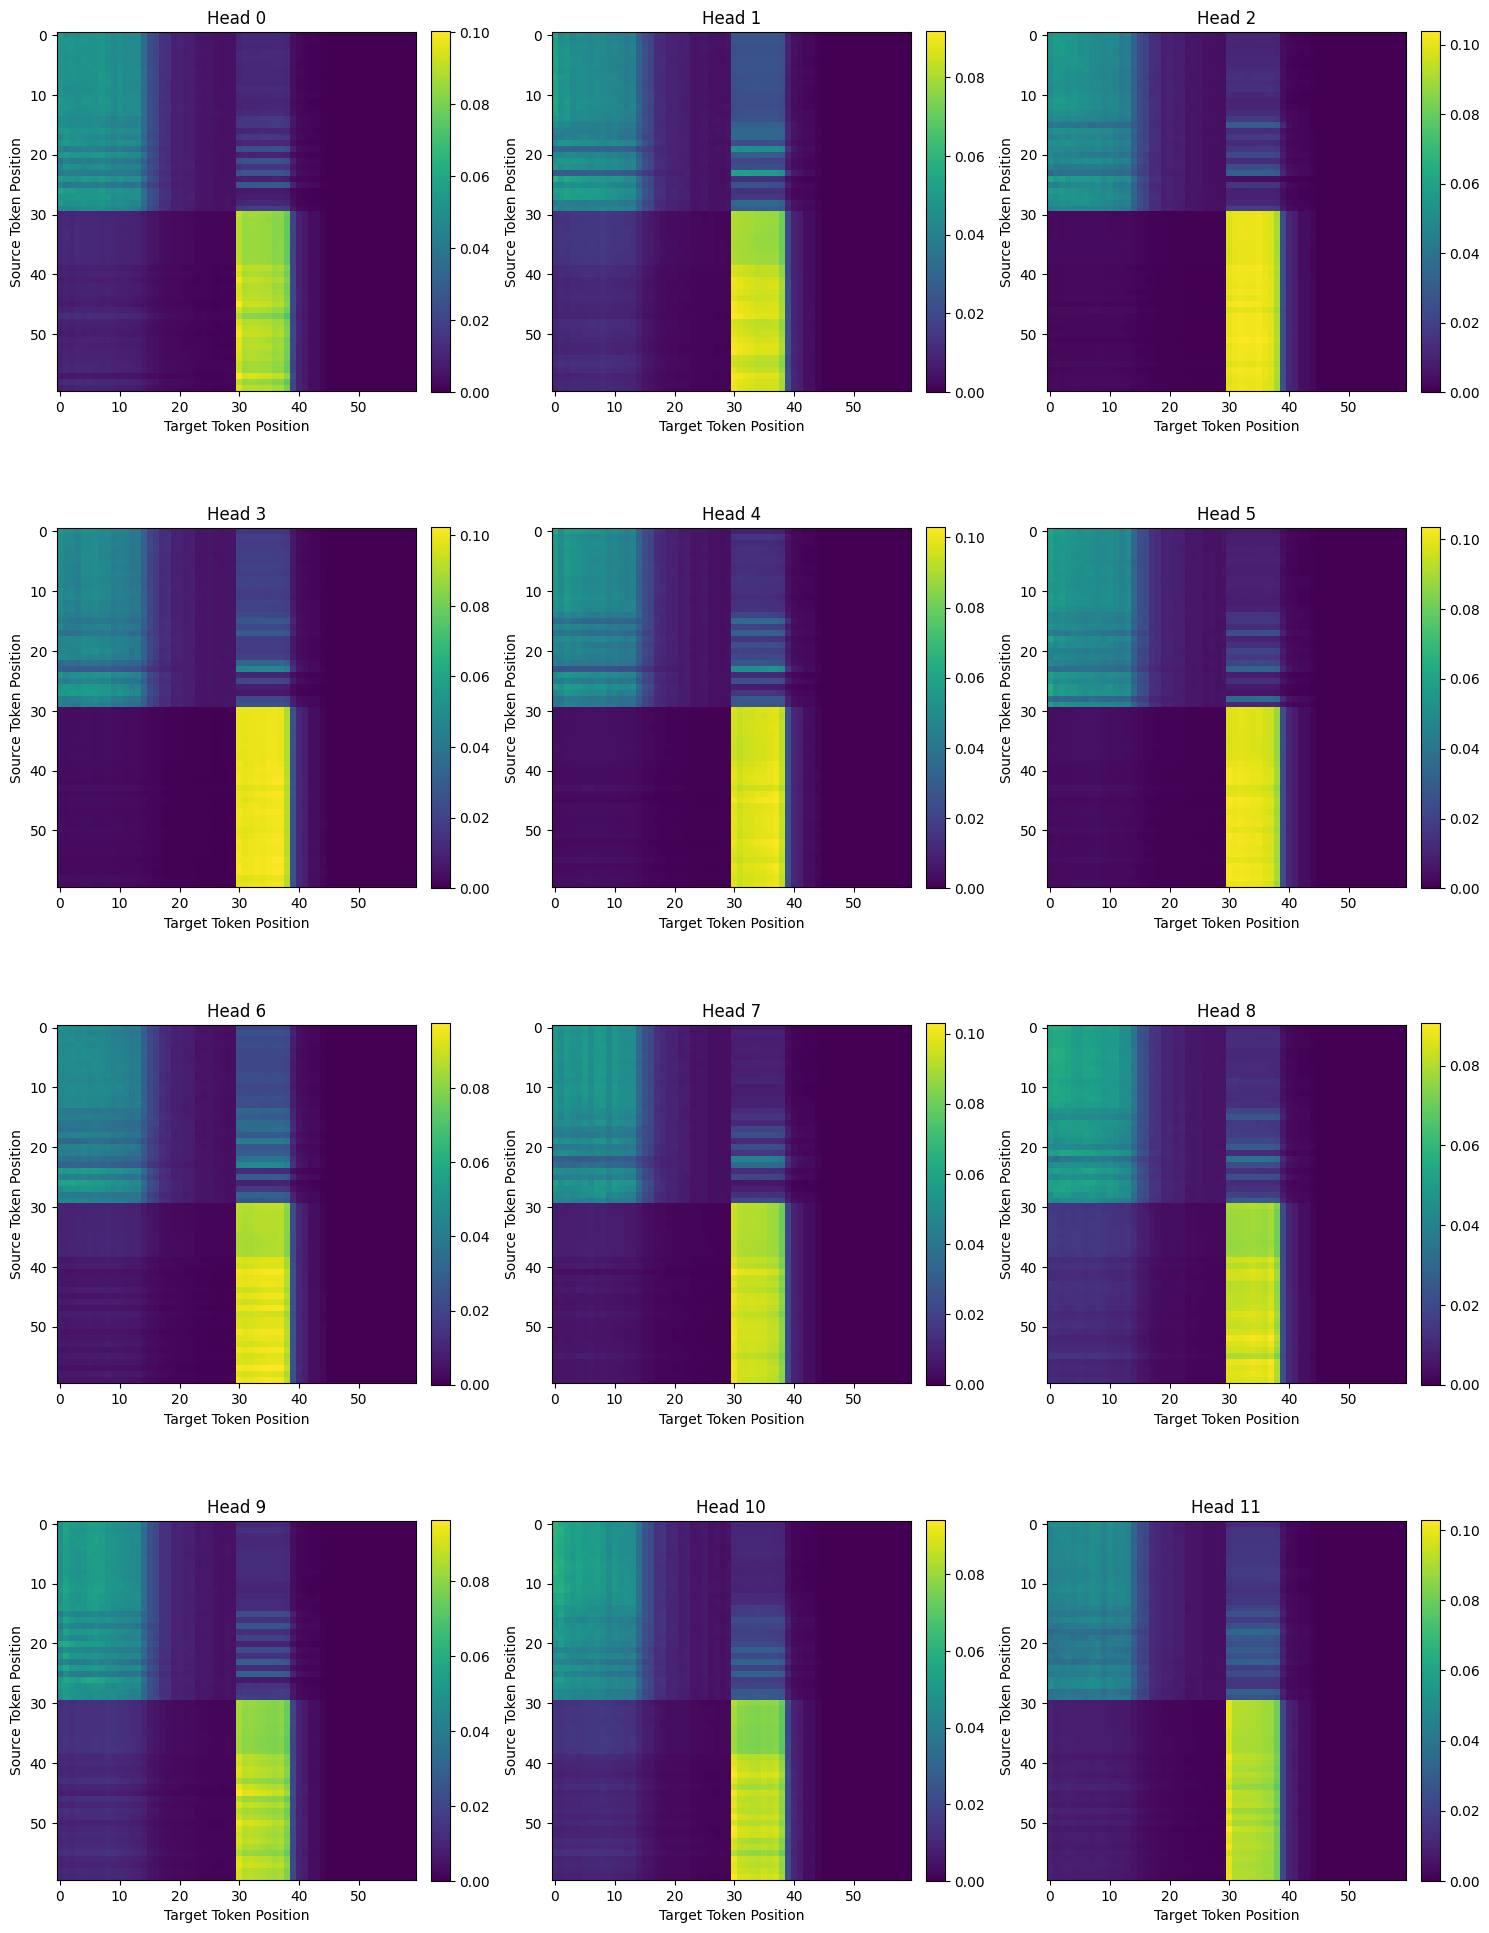

In [7]:
filepaths = [os.path.join(save_dir, f"cross_attention_layer_4_head_{i}.npy") for i in range(12)]  # assuming 12 layers
display_avg_attention_scores(filepaths)

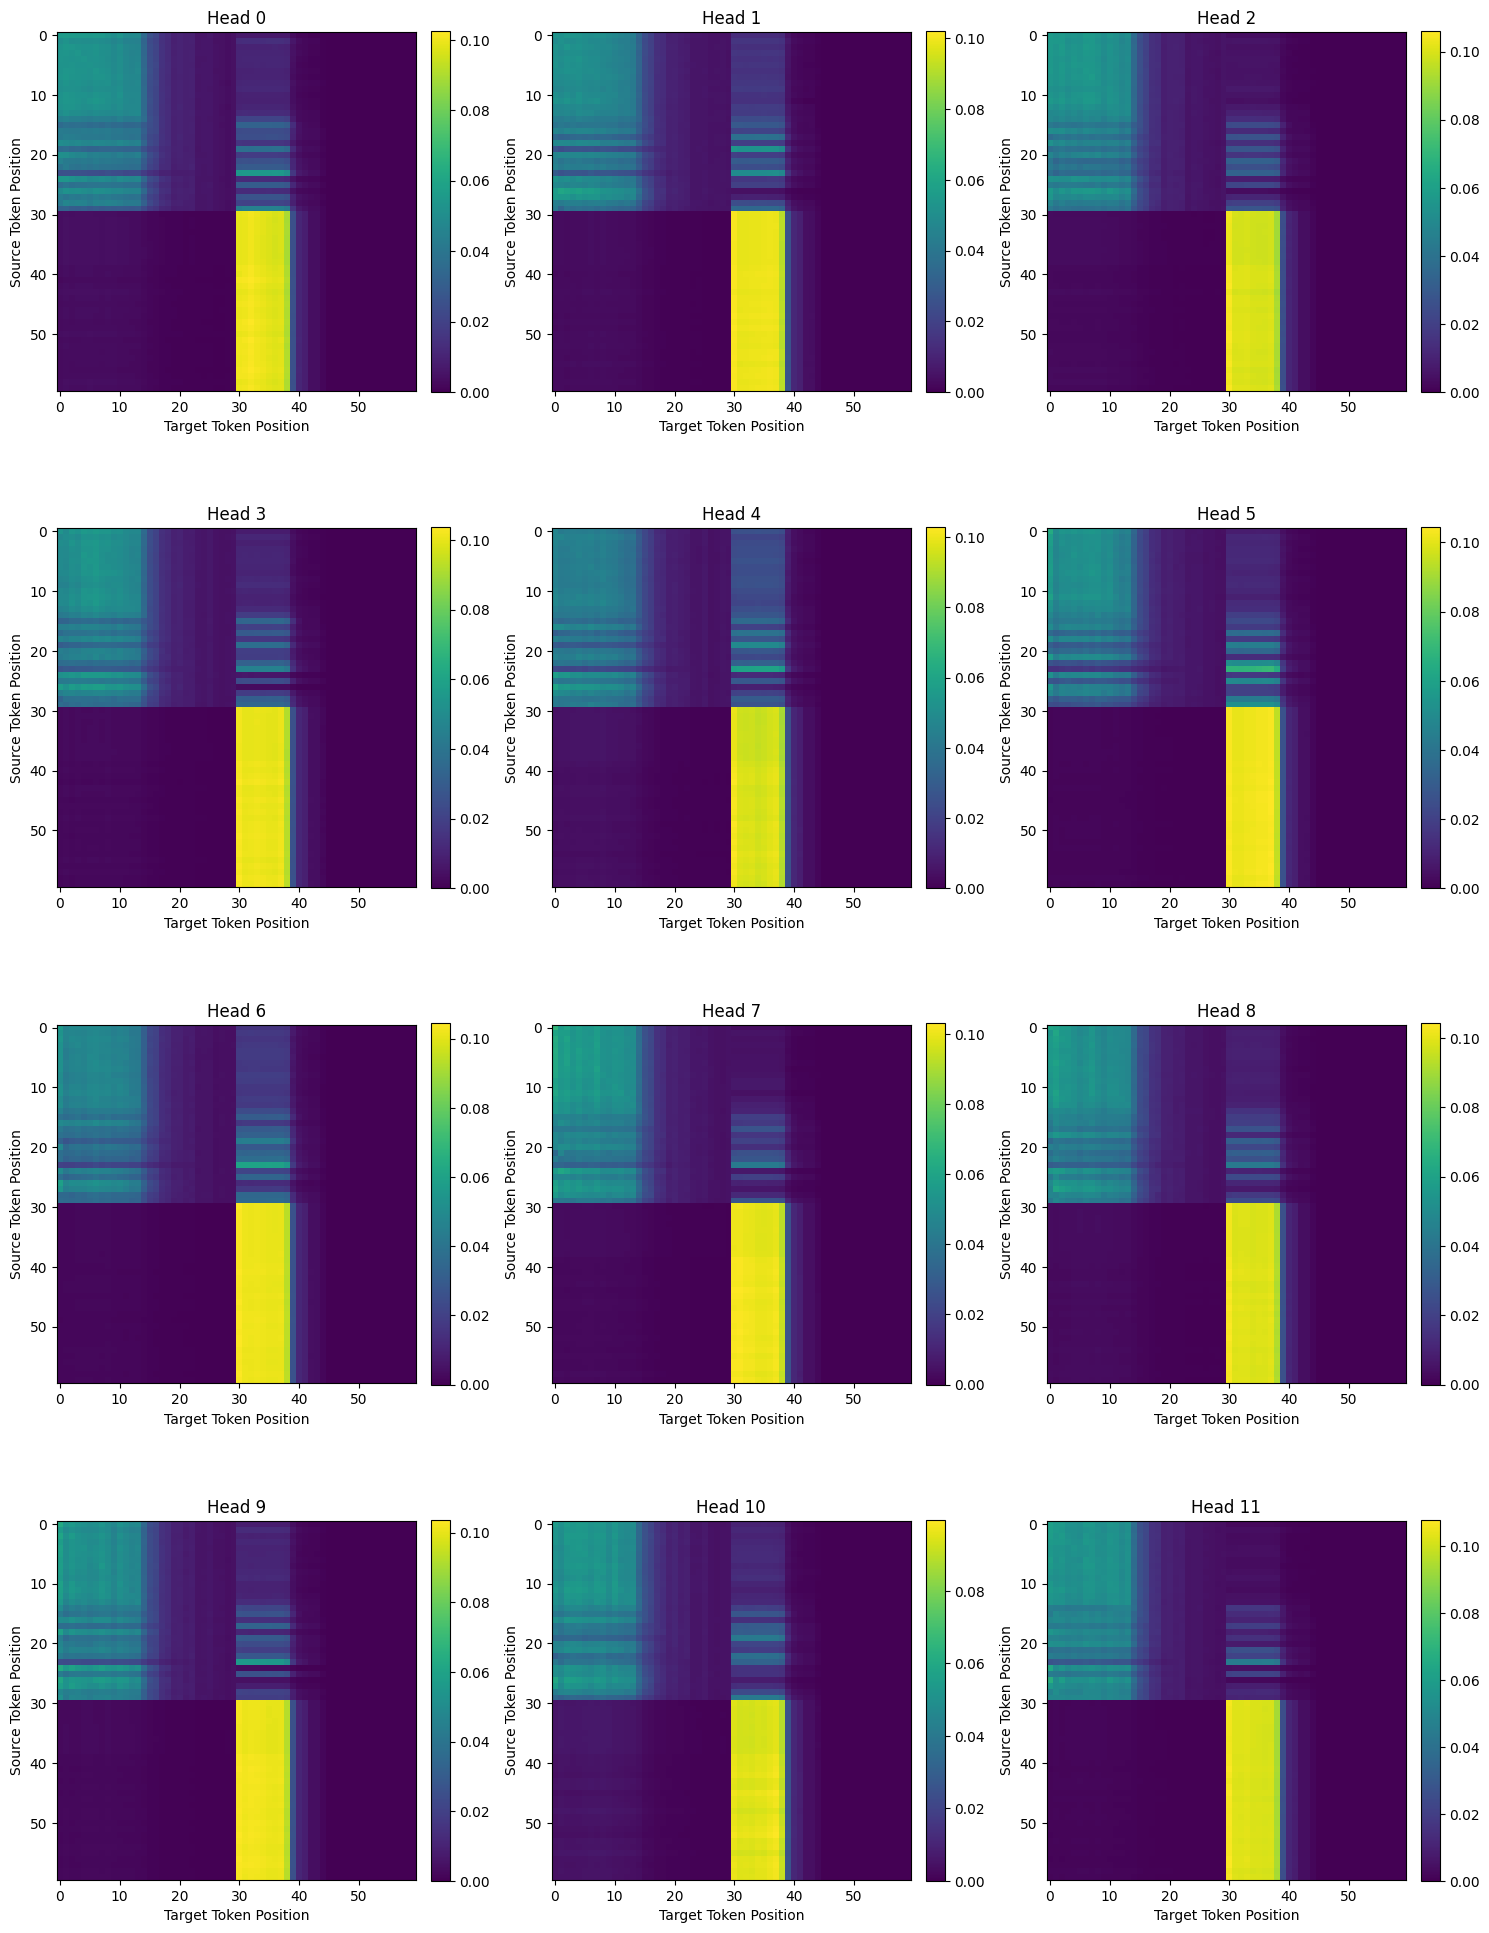

In [8]:
filepaths = [os.path.join(save_dir, f"cross_attention_layer_5_head_{i}.npy") for i in range(12)]  # assuming 12 layers
display_avg_attention_scores(filepaths)